Christopher De La Rosa

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
import shapely.geometry as sgeom
import cartopy.io.shapereader as shpreader

In [2]:
#the column names are absurdly long, so these variables will hopefully take care of that

a = "Consumer direct sales - Farms"
b = "Consumer direct sales - Value of sales (dollars)"
c = "Retail markets, institutions, or food hubs - Farms"
d = "Retail markets, institutions, or food hubs - Value of sales (dollars)"
e = "Production of processed or value-added organic products - Farms"
f = "Production of processed or value-added organic products - Value of sales (dollars)"
g = "Marketing through community supported agriculture shares (CSA's) - Farms"

In [3]:
data = pd.read_csv("projectdata.csv")

In [4]:
data = data.fillna(0)

In [5]:
data = data.set_index("Geographic area")

In [6]:
data

,Consumer direct sales - Farms,Consumer direct sales - Value of sales (dollars),"Retail markets, institutions, or food hubs - Farms","Retail markets, institutions, or food hubs - Value of sales (dollars)",Production of processed or value-added organic products - Farms,Production of processed or value-added organic products - Value of sales (dollars),Marketing through community supported agriculture shares (CSA's) - Farms,Total Value,Population
Geographic area,,,,,,,,,
United States,2993,300321165.0,3196.0,2.035391e+09,1318.0,726546686.0,1164.0,3062258430,328239523
Alabama,5,112640.0,5.0,9.389600e+05,4.0,0.0,1.0,1051600,4903185
Alaska,2,0.0,4.0,0.000000e+00,0.0,0.0,0.0,0,731545
Arizona,10,1179000.0,12.0,1.093888e+08,7.0,23593212.0,6.0,134161008,7278717
Arkansas,6,30553.0,10.0,1.345840e+06,0.0,0.0,0.0,1376393,3017804
California,627,148162436.0,779.0,9.744363e+08,381.0,418291803.0,166.0,1540890549,39512223
Colorado,37,4897225.0,61.0,1.988874e+07,23.0,3735456.0,19.0,28521419,5758736
Connecticut,35,1150961.0,23.0,2.825105e+06,15.0,38516.0,18.0,4014582,3565287
Delaware,5,68944.0,0.0,0.000000e+00,0.0,0.0,0.0,68944,973764


In [7]:
total_dollar_per_person = []

for i in data.index:
    total_dollar_per_person.append((data.loc[i]["Total Value"]/data.loc[i]["Population"]))

In [8]:
total_dollar_per_person

[9.329340970313316,
 0.21447283755354937,
 0.0,
 18.43195826956866,
 0.45609091909216104,
 38.997819712649424,
 4.952722090403172,
 1.1260193078425385,
 0.07080154945140711,
 2.1848745051678398,
 3.2683032408146495,
 20.648908940921213,
 8.66123224393069,
 0.24665594629217064,
 1.491844665183946,
 1.4540587055120806,
 0.27389563912437864,
 0.8875304884668148,
 0.0,
 19.80342609647883,
 1.573733806618941,
 4.638259279684028,
 1.751101455262123,
 1.0232006272749712,
 0.0,
 1.8345082011552722,
 13.887032667214333,
 0.5354863089896237,
 0.07283429800308816,
 3.2263429508182253,
 1.5272020751638955,
 1.3523029298049578,
 2.99426094790563,
 0.7740971563538201,
 0.0,
 1.5926523855557742,
 0.06131482894365412,
 19.922331809688465,
 6.552732391818178,
 2.401311734149171,
 0.34145108856308587,
 0.10525976675758682,
 0.24618789915149328,
 0.424079199386975,
 5.276267499449463,
 103.44150938558212,
 0.21712868309472452,
 83.2503456056441,
 0.17600844127183762,
 2.6713075665606514,
 0.3152814902230

In [9]:
data["Total Dollar Value per Person"] = total_dollar_per_person

In [10]:
data

,Consumer direct sales - Farms,Consumer direct sales - Value of sales (dollars),"Retail markets, institutions, or food hubs - Farms","Retail markets, institutions, or food hubs - Value of sales (dollars)",Production of processed or value-added organic products - Farms,Production of processed or value-added organic products - Value of sales (dollars),Marketing through community supported agriculture shares (CSA's) - Farms,Total Value,Population,Total Dollar Value per Person
Geographic area,,,,,,,,,,
United States,2993,300321165.0,3196.0,2.035391e+09,1318.0,726546686.0,1164.0,3062258430,328239523,9.329341
Alabama,5,112640.0,5.0,9.389600e+05,4.0,0.0,1.0,1051600,4903185,0.214473
Alaska,2,0.0,4.0,0.000000e+00,0.0,0.0,0.0,0,731545,0.000000
Arizona,10,1179000.0,12.0,1.093888e+08,7.0,23593212.0,6.0,134161008,7278717,18.431958
Arkansas,6,30553.0,10.0,1.345840e+06,0.0,0.0,0.0,1376393,3017804,0.456091
California,627,148162436.0,779.0,9.744363e+08,381.0,418291803.0,166.0,1540890549,39512223,38.997820
Colorado,37,4897225.0,61.0,1.988874e+07,23.0,3735456.0,19.0,28521419,5758736,4.952722
Connecticut,35,1150961.0,23.0,2.825105e+06,15.0,38516.0,18.0,4014582,3565287,1.126019
Delaware,5,68944.0,0.0,0.000000e+00,0.0,0.0,0.0,68944,973764,0.070802


In [11]:
direct_dollar_per_person = []

for i in data.index:
    direct_dollar_per_person.append((data.loc[i][b]/data.loc[i]["Population"]))

In [12]:
data["Consumer Direct Sales Dollar Value per Person"] = direct_dollar_per_person

In [13]:
retail_dollar_per_person = []

for i in data.index:
    retail_dollar_per_person.append((data.loc[i][d]/data.loc[i]["Population"]))

In [14]:
data["Retail etc. Dollar Value per Person"] = retail_dollar_per_person

In [15]:
production_dollar_per_person = []

for i in data.index:
    production_dollar_per_person.append((data.loc[i][f]/data.loc[i]["Population"]))

In [16]:
data["Production of processed or value-added organic products Dollar Value per Person"] = production_dollar_per_person

In [17]:
data

,Consumer direct sales - Farms,Consumer direct sales - Value of sales (dollars),"Retail markets, institutions, or food hubs - Farms","Retail markets, institutions, or food hubs - Value of sales (dollars)",Production of processed or value-added organic products - Farms,Production of processed or value-added organic products - Value of sales (dollars),Marketing through community supported agriculture shares (CSA's) - Farms,Total Value,Population,Total Dollar Value per Person,Consumer Direct Sales Dollar Value per Person,Retail etc. Dollar Value per Person,Production of processed or value-added organic products Dollar Value per Person
Geographic area,,,,,,,,,,,,,
United States,2993,300321165.0,3196.0,2.035391e+09,1318.0,726546686.0,1164.0,3062258430,328239523,9.329341,0.914945,6.200931,2.213465
Alabama,5,112640.0,5.0,9.389600e+05,4.0,0.0,1.0,1051600,4903185,0.214473,0.022973,0.191500,0.000000
Alaska,2,0.0,4.0,0.000000e+00,0.0,0.0,0.0,0,731545,0.000000,0.000000,0.000000,0.000000
Arizona,10,1179000.0,12.0,1.093888e+08,7.0,23593212.0,6.0,134161008,7278717,18.431958,0.161979,15.028582,3.241397
Arkansas,6,30553.0,10.0,1.345840e+06,0.0,0.0,0.0,1376393,3017804,0.456091,0.010124,0.445967,0.000000
California,627,148162436.0,779.0,9.744363e+08,381.0,418291803.0,166.0,1540890549,39512223,38.997820,3.749787,24.661642,10.586390
Colorado,37,4897225.0,61.0,1.988874e+07,23.0,3735456.0,19.0,28521419,5758736,4.952722,0.850399,3.453664,0.648659
Connecticut,35,1150961.0,23.0,2.825105e+06,15.0,38516.0,18.0,4014582,3565287,1.126019,0.322824,0.792392,0.010803
Delaware,5,68944.0,0.0,0.000000e+00,0.0,0.0,0.0,68944,973764,0.070802,0.070802,0.000000,0.000000


<AxesSubplot:>

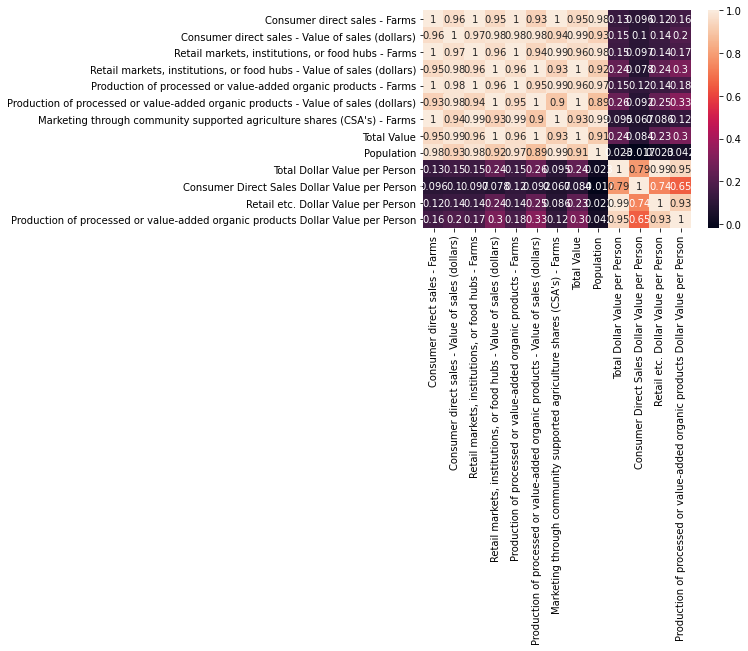

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
#next get percentages for each and then maybe do a linreg? main thing is visualization

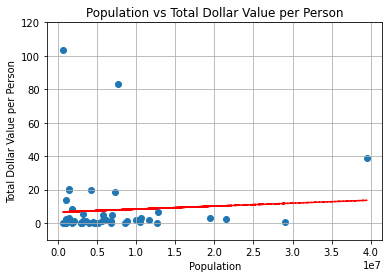

In [21]:
z = np.polyfit(data.loc["Alabama":]["Population"], data.loc["Alabama":]["Total Dollar Value per Person"], 1)
p = np.poly1d(z)

fig,ax = plt.subplots()

plt.scatter(data.loc["Alabama":]["Population"], data.loc["Alabama":]["Total Dollar Value per Person"])
plt.xlabel("Population")
plt.ylabel("Total Dollar Value per Person")
plt.title("Population vs Total Dollar Value per Person")
plt.grid(True)
ax.set_ylim([-10,120])
plt.plot(data.loc["Alabama":]["Population"],p(data.loc["Alabama":]["Population"]),"r--")

plt.savefig("PopulationVSTotalDollarValueperPerson.png")
plt.show()

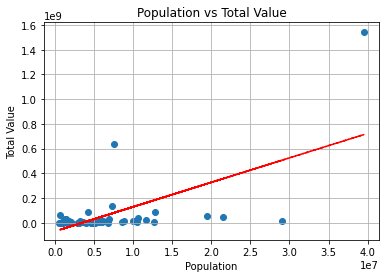

In [22]:
z = np.polyfit(data.loc["Alabama":]["Population"], data.loc["Alabama":]["Total Value"], 1)
p = np.poly1d(z)

fig,ax = plt.subplots()

plt.scatter(data.loc["Alabama":]["Population"], data.loc["Alabama":]["Total Value"])
plt.xlabel("Population")
plt.ylabel("Total Value")
plt.title("Population vs Total Value")
plt.grid(True)
plt.plot(data.loc["Alabama":]["Population"],p(data.loc["Alabama":]["Population"]),"r--")

plt.savefig("PopulationVSTotalValue.png")
plt.show()

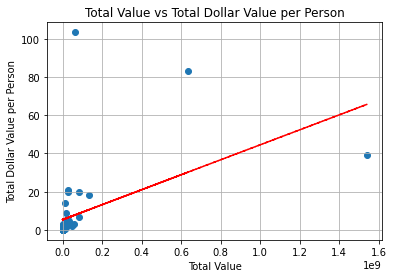

In [23]:
z = np.polyfit(data.loc["Alabama":]["Total Value"], data.loc["Alabama":]["Total Dollar Value per Person"], 1)
p = np.poly1d(z)

fig,ax = plt.subplots()

plt.scatter(data.loc["Alabama":]["Total Value"], data.loc["Alabama":]["Total Dollar Value per Person"])
plt.xlabel("Total Value")
plt.ylabel("Total Dollar Value per Person")
plt.title("Total Value vs Total Dollar Value per Person")
plt.grid(True)
plt.plot(data.loc["Alabama":]["Total Value"],p(data.loc["Alabama":]["Total Value"]),"r--")

plt.savefig("TotalValueVSTotalDollarValueperPerson.png")
plt.show()

In [24]:
labels = data.index[1:]
direct = data.loc['Alabama':][b]
retail = data.loc['Alabama':][d]
other = data.loc['Alabama':][f]

<ipython-input-25-31d3359ab12c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


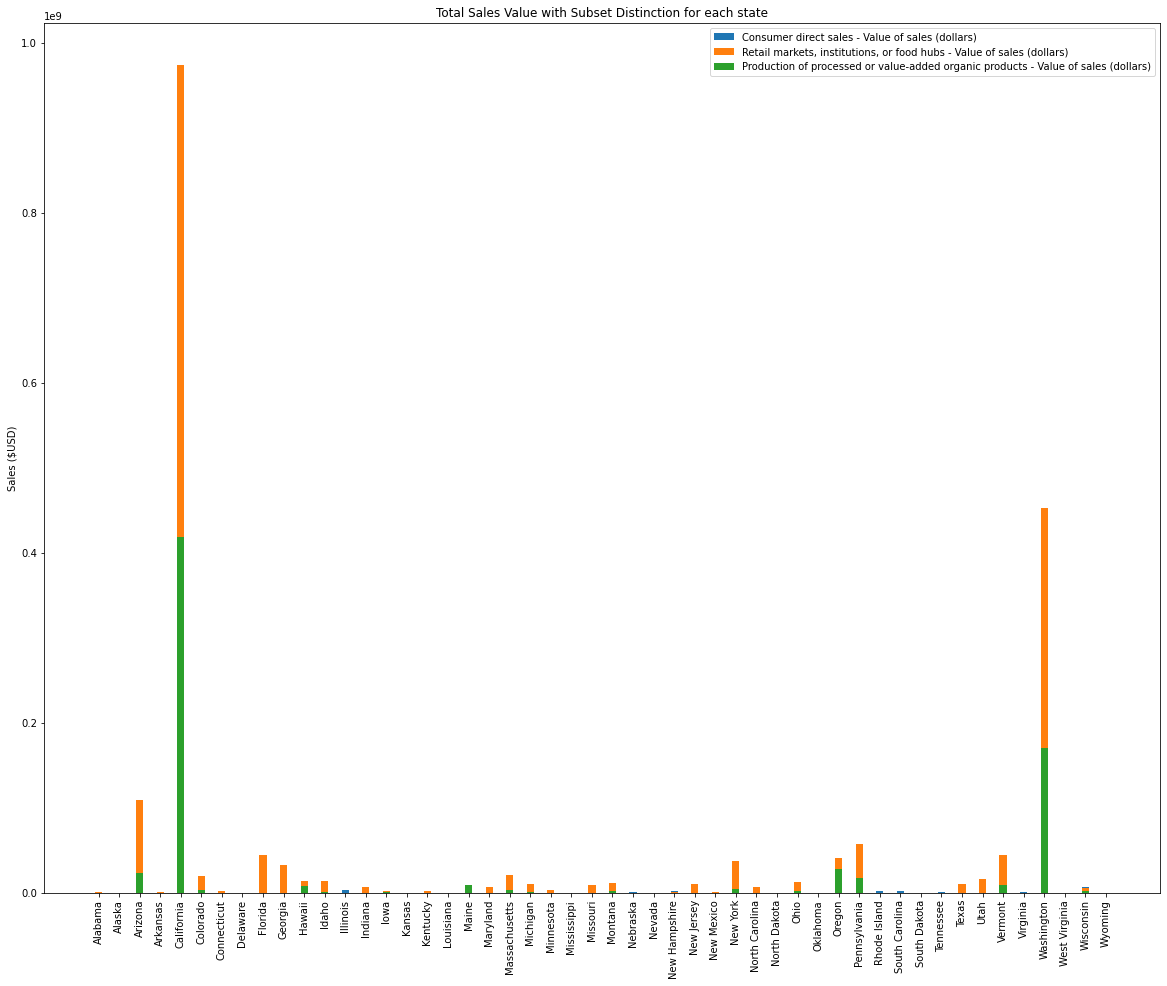

In [25]:
fig, ax = plt.subplots(figsize = (20,16))

ax.bar(labels, direct, width = 0.35, label=b)
ax.bar(labels, retail, width = 0.35, label = d)
ax.bar(labels, other, width = 0.35, label = f)

ax.set_ylabel('Sales ($USD)')
ax.set_title('Total Sales Value with Subset Distinction for each state')
ax.legend()

ax.set_xticklabels(labels, rotation=90)

plt.savefig('bar_chart.png')
plt.show()

In [26]:
totalp_slope, totalp_intercept, totalp_r_value, totalp_p_value, totalp_std_err = stats.linregress(data.loc['Alabama':]["Population"],data.loc['Alabama':]["Total Dollar Value per Person"])

In [27]:
stats.linregress(data.loc['Alabama':]["Population"],data.loc['Alabama':]["Total Dollar Value per Person"])

LinregressResult(slope=1.7905883335147504e-07, intercept=6.534231104837948, rvalue=0.06866267211845303, pvalue=0.6356438871936771, stderr=3.755158355942288e-07)

In [28]:
totalxtotal_slope, totalxtotal_intercept, totalxtotal_r_value, totalxtotal_p_value, totalxtotal_std_err = stats.linregress(data.loc["Alabama":]["Total Value"], data.loc["Alabama":]["Total Dollar Value per Person"])

In [29]:
stats.linregress(data.loc["Alabama":]["Total Value"], data.loc["Alabama":]["Total Dollar Value per Person"])

LinregressResult(slope=3.915898018429209e-08, intercept=5.35503936484205, rvalue=0.47213099707506306, pvalue=0.0005369884427943572, stderr=1.0553209234289893e-08)

In [30]:
total_slope, total_intercept, total_r_value, total_p_value, total_std_err = stats.linregress(data.loc["Alabama":]["Population"], data.loc["Alabama":]["Total Value"])

In [31]:
stats.linregress(data.loc["Alabama":]["Population"], data.loc["Alabama":]["Total Value"])

LinregressResult(slope=19.802136635385786, intercept=-69645256.35984263, rvalue=0.6298046482414749, pvalue=9.573773383410818e-07, stderr=3.525078796502857)

In [32]:
#data_x = xr.open_dataset('/Users/chris/Downloads/GitHubDownloads/projectdata.csv', decode_times = False)